In [1]:
#Importing libraries
import Simulator
import Statistics
import KalmanFilter



c:\Users\florianb\Documents\advectionDiffusion\Statistics.py:11: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from mpl_toolkits.axes_grid1.colorbar import colorbar


### Model definition (advection diffusion)

In [2]:
grid = Simulator.Grid(nx=30,ny=20,cell_size=20)
simulator = Simulator.Simulator(grid, dt=0.0)

### Initialisation of distributions

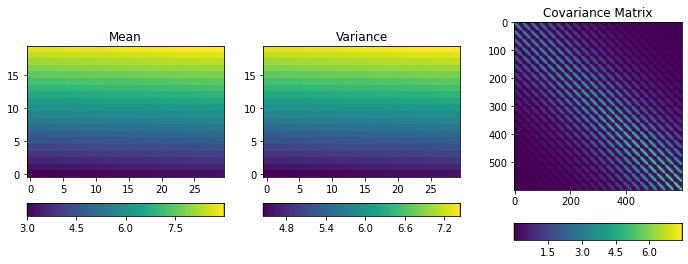

In [3]:
statistics = Statistics.Statistics(simulator, phi=0.02)
statistics.plot()
mean = statistics.mean
cov = statistics.cov


### Observations for assimilation

In [4]:
observation = Simulator.Observation(simulator)
obs = observation.value

### Filtering

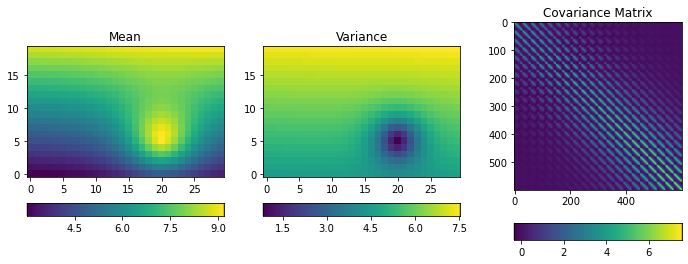

In [5]:
kalman = KalmanFilter.Kalman(simulator, observation, statistics)
mean, cov = kalman.filter(mean, cov, obs)
statistics.plot()

### Forward run with advection diffusion

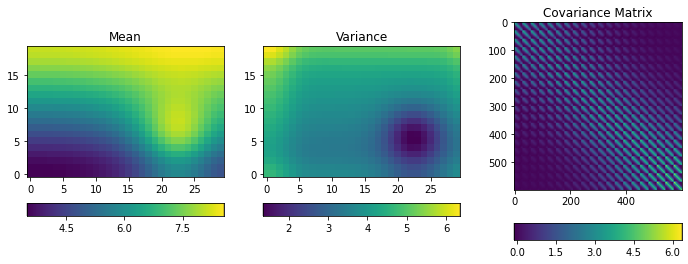

In [6]:
simulator = Simulator.Simulator(grid)
for t in range(50):
    mean, cov = simulator.forecasting(mean, cov)
statistics.set(mean, cov)
statistics.plot()